Erik_Marsja [youtube](https://www.youtube.com/watch?time_continue=146&v=Lp2aV_4LF48) [blog](https://www.marsja.se/three-ways-to-carry-out-2-way-anova-with-python/)
[wiki](https://en.wikipedia.org/wiki/Two-way_analysis_of_variance)
[Understandable_Statistics](https://www.youtube.com/watch?v=6TJ7wu3TpUM&list=PL4BztsgicSEeC4Oic6s5vW4LE-0YZTuo-&index=12)
[statisticsfun](https://www.youtube.com/playlist?list=PLWtoq-EhUJe2TjJYfZUQtuq7a0dQCnOWp)

In [1]:
%matplotlib inline

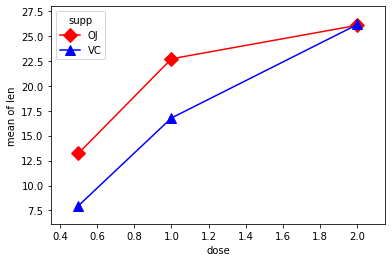

In [2]:
import pandas as pd
from statsmodels.graphics.factorplots import interaction_plot

df = pd.read_csv("data/ToothGrowth.csv", usecols=[1,2,3])
# print(df.head())
# print(df.shape) # (60, 3)
fig = interaction_plot(df.dose, df.supp, df.len,
                       colors=['red','blue'], markers=['D','^'], ms=10)

In [3]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# the "C" indicates categorical data
model = ols('len ~ C(supp) + C(dose) + C(supp):C(dose)', df).fit()
print(anova_lm(model))

                   df       sum_sq      mean_sq          F        PR(>F)
C(supp)           1.0   205.350000   205.350000  15.571979  2.311828e-04
C(dose)           2.0  2426.434333  1213.217167  91.999965  4.046291e-18
C(supp):C(dose)   2.0   108.319000    54.159500   4.106991  2.186027e-02
Residual         54.0   712.106000    13.187148        NaN           NaN


<div align="center"><img src="img/Screen Shot 2019-08-15 at 2.21.10 PM.png" width="60%" height="30%"></div>

[Understandable_Statistics](https://www.youtube.com/watch?v=6TJ7wu3TpUM&list=PL4BztsgicSEeC4Oic6s5vW4LE-0YZTuo-&index=12)

In [4]:
import numpy as np

g = df.groupby(['supp','dose'])
for key, value in g:
    print(key)
    print(value)

('OJ', 0.5)
     len supp  dose
30  15.2   OJ   0.5
31  21.5   OJ   0.5
32  17.6   OJ   0.5
33   9.7   OJ   0.5
34  14.5   OJ   0.5
35  10.0   OJ   0.5
36   8.2   OJ   0.5
37   9.4   OJ   0.5
38  16.5   OJ   0.5
39   9.7   OJ   0.5
('OJ', 1.0)
     len supp  dose
40  19.7   OJ   1.0
41  23.3   OJ   1.0
42  23.6   OJ   1.0
43  26.4   OJ   1.0
44  20.0   OJ   1.0
45  25.2   OJ   1.0
46  25.8   OJ   1.0
47  21.2   OJ   1.0
48  14.5   OJ   1.0
49  27.3   OJ   1.0
('OJ', 2.0)
     len supp  dose
50  25.5   OJ   2.0
51  26.4   OJ   2.0
52  22.4   OJ   2.0
53  24.5   OJ   2.0
54  24.8   OJ   2.0
55  30.9   OJ   2.0
56  26.4   OJ   2.0
57  27.3   OJ   2.0
58  29.4   OJ   2.0
59  23.0   OJ   2.0
('VC', 0.5)
    len supp  dose
0   4.2   VC   0.5
1  11.5   VC   0.5
2   7.3   VC   0.5
3   5.8   VC   0.5
4   6.4   VC   0.5
5  10.0   VC   0.5
6  11.2   VC   0.5
7  11.2   VC   0.5
8   5.2   VC   0.5
9   7.0   VC   0.5
('VC', 1.0)
     len supp  dose
10  16.5   VC   1.0
11  16.5   VC   1.0
12  15.2   

<div align="center"><img src="img/Screen Shot 2019-08-15 at 2.21.26 PM.png" width="80%" height="30%"></div>

[Understandable_Statistics](https://www.youtube.com/watch?v=6TJ7wu3TpUM&list=PL4BztsgicSEeC4Oic6s5vW4LE-0YZTuo-&index=12)

In [5]:
import numpy as np

g = df.groupby(['supp','dose'])
df_mean = pd.DataFrame(np.zeros((2,3)), index=['OJ','VC'])
df_mean.columns = [0.5,1.0,2.0]
for key, value in g:
    df_mean.loc[key[0],key[1]] = value.len.mean() 
print(df_mean)

mean_table = df_mean.copy()
mean_table.loc['Column_Means',:] = df_mean.mean()
mean_table.loc[:,'Row_Means'] = df_mean.mean(axis=1)
mean_table.iloc[-1,-1] = df.len.mean()
print(mean_table)

      0.5    1.0    2.0
OJ  13.23  22.70  26.06
VC   7.98  16.77  26.14
                 0.5     1.0    2.0  Row_Means
OJ            13.230  22.700  26.06  20.663333
VC             7.980  16.770  26.14  16.963333
Column_Means  10.605  19.735  26.10  18.813333


<div align="center"><img src="img/Screen Shot 2019-08-15 at 4.18.23 PM.png" width="80%" height="30%"></div>

[Understandable_Statistics](https://www.youtube.com/watch?v=6TJ7wu3TpUM&list=PL4BztsgicSEeC4Oic6s5vW4LE-0YZTuo-&index=12)

In [6]:
global_mean = df.len.mean()
SS_total = np.sum((df.len - global_mean)**2)
print('SS_total : {}'.format(SS_total))

SS_treatment = np.sum(np.sum((df_mean - global_mean)**2)) * (df.shape[0]/6)
print('SS_treatment : {}'.format(SS_treatment))

SS_error = SS_total - SS_treatment
print('SS_error : {}'.format(SS_error))

SS_total : 3452.2093333333337
SS_treatment : 2740.1033333333326
SS_error : 712.1060000000011


<div align="center"><img src="img/Screen Shot 2019-08-15 at 4.19.01 PM.png" width="100%" height="30%"></div>

[Understandable_Statistics](https://www.youtube.com/watch?v=6TJ7wu3TpUM&list=PL4BztsgicSEeC4Oic6s5vW4LE-0YZTuo-&index=12)

In [7]:
SS_supp = np.sum((mean_table.iloc[:-1,-1]-global_mean)**2) * ((df.shape[0]/6) * 3)
SS_dose = np.sum((mean_table.iloc[-1,:-1]-global_mean)**2) * ((df.shape[0]/6) * 2)
SS_interaction = SS_treatment - SS_supp - SS_dose  
print('SS_supp : {}'.format(SS_supp))
print('SS_dose : {}'.format(SS_dose))
print('SS_interaction : {}'.format(SS_interaction))

SS_supp : 205.3499999999999
SS_dose : 2426.4343333333336
SS_interaction : 108.31899999999905


<div align="center"><img src="img/Screen Shot 2019-08-15 at 2.26.15 PM.png" width="80%" height="30%"></div>

[Understandable_Statistics](https://www.youtube.com/watch?v=6TJ7wu3TpUM&list=PL4BztsgicSEeC4Oic6s5vW4LE-0YZTuo-&index=12)

In [8]:
DF_supp = 2-1
DF_dose = 3-1
DF_interaction = (2-1)*(3-1) 
DF_total = df.shape[0] - 1
DF_error = DF_total - DF_supp - DF_dose - DF_interaction 

<div align="center"><img src="img/Screen Shot 2019-08-15 at 4.23.01 PM.png" width="80%" height="30%"></div>

[Understandable_Statistics](https://www.youtube.com/watch?v=6TJ7wu3TpUM&list=PL4BztsgicSEeC4Oic6s5vW4LE-0YZTuo-&index=12)

In [9]:
MS_supp = SS_supp / DF_supp
MS_dose = SS_dose / DF_dose
MS_interaction = SS_interaction / DF_interaction 
MS_error = SS_error / DF_error

<div align="center"><img src="img/Screen Shot 2019-08-15 at 2.27.12 PM.png" width="80%" height="30%"></div>

[Understandable_Statistics](https://www.youtube.com/watch?v=6TJ7wu3TpUM&list=PL4BztsgicSEeC4Oic6s5vW4LE-0YZTuo-&index=12)

In [10]:
import scipy.stats as stats

F_supp = MS_supp / MS_error 
F_dose = MS_dose / MS_error
F_interaction = MS_interaction / MS_error 
print(F_supp, F_dose, F_interaction)

p_value_supp = 1 - stats.f.cdf(F_supp, DF_supp, DF_error) 
p_value_dose = 1 - stats.f.cdf(F_dose, DF_dose, DF_error) 
p_value_interaction = 1 - stats.f.cdf(F_interaction, DF_interaction, DF_error) 
print(p_value_supp, p_value_dose, p_value_interaction)

15.571979452497208 91.99996489286693 4.106991094022477
0.00023118280977341144 1.1102230246251565e-16 0.021860268964791763
